### Question 14:
At first we import required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

Now we define time variable using linspace.

In [79]:
np.random.seed(7)
time = np.linspace(0, 10, 1000)

The next step is to Build 3 signals needed. The first one is a sinusoidal with w = 4 and the second one os square signal with w = 5 and the last one is a sawtooth with w = 6.

In [101]:
S1 = np.sin(4 * time)
S2 = np.sign(np.sin(5 * time))
S3 = signal.sawtooth(6 * time)

Now we add these 3 together and also add a normal noise signal to the mixture.

In [102]:
S = np.c_[S1, S2, S3]
S = S + 0.1 * np.random.normal(size = S.shape)

The nex step is to normalize and also define mixing matrix.

In [103]:
S = S / S.std(axis = 0)
X = np.dot(S, np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]).T)

The final step is to fit the ICA model to datapoints.

In [104]:
ICA = FastICA(n_components = 3)
S2 = ICA.fit_transform(X)

Now we plot the real sources and ICA's result.

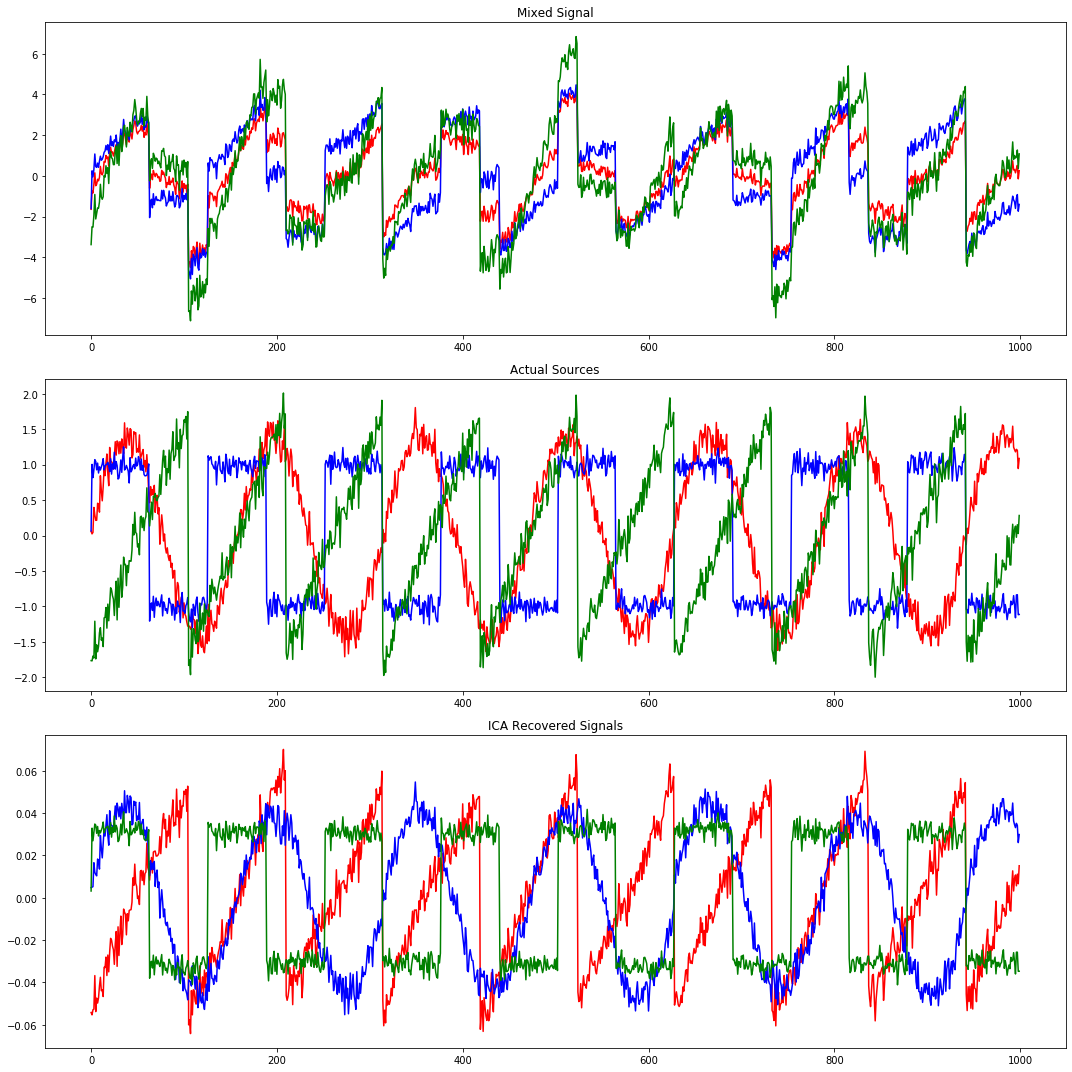

In [105]:
plt.figure(figsize = [15, 15])
models = [X, S, S2]
for ii, (model, name) in enumerate(zip(models, ['Mixed Signal', 'Actual Sources', 'ICA Recovered Signals']), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, ['red', 'blue', 'green']):
        plt.plot(sig, color = color)

plt.tight_layout()
plt.show()

It can be seen that our model worked perfectly and discriminated these 3 signals from each other perfectly although the amplitude is not correct and th result might change if you run te code again in a way that square signal is determined with opposite cycle and the DC value is hidden in the sawtooth or sinusoidal signals. Overall the performance is alright but the uncertainities in ICA are visible in the result. 